In [23]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
df = pd.read_excel('Data_All.xlsx')
df2 = df.sample(frac=1, random_state=42).reset_index(drop=True)
x=df2.iloc[ : , 0:4]
y=df2['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)
LR = LogisticRegression(C=0.01, penalty= 'none', solver= 'newton-cg')
LR.fit(x_train, y_train)
LR_pred = LR.predict(x_test)
LR_acc = accuracy_score(y_test, LR_pred)
LR_acc

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


0.9666666666666667

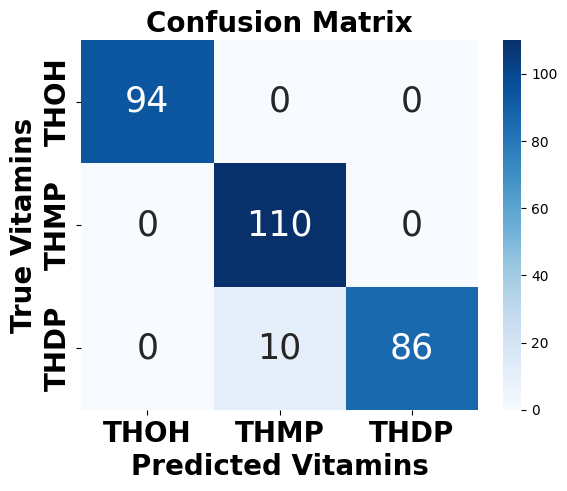

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
cm_LR = confusion_matrix(y_test, LR_pred)
cm_LR_df = pd.DataFrame(cm_LR,
                     index = ['THOH','THMP','THDP'],
                     columns = ['THOH','THMP','THDP'])

sns.heatmap(cm_LR_df, cbar=True,annot=True,cmap="Blues",fmt="d",annot_kws={"size": 25})
plt.ylabel('True Vitamins', fontsize = 20,weight='bold')
plt.xlabel('Predicted Vitamins', fontsize = 20,weight='bold')
plt.title('Confusion Matrix', fontsize = 20,weight='bold')
plt.xticks(weight='bold', fontsize = 20)
plt.yticks(weight='bold', fontsize = 20)
plt.show()